### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN' ,'NAME'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

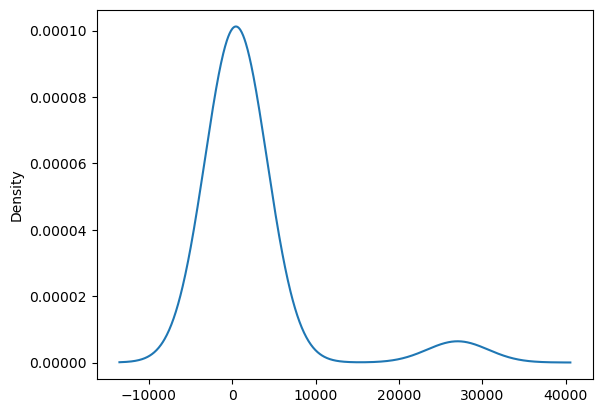

In [5]:
# Visualize the value counts of APPLICATION_TYPE
s=application_df['APPLICATION_TYPE'].value_counts()
s.plot.kde()

In [6]:
# Determine which values to replace if counts are less than 528
replace_application=s.loc[lambda x : x<528].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
c=application_df.CLASSIFICATION.value_counts()
c

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

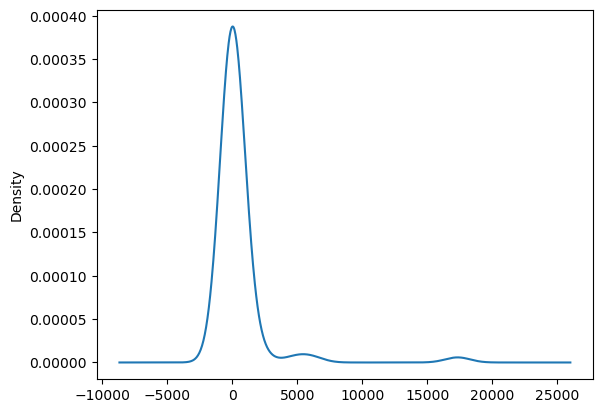

In [8]:
# Visualize the value counts of CLASSIFICATION
c.plot.kde()

In [9]:
# Determine which values to replace if counts are less than 1883
replace_class=c.loc[lambda x : x<1883].index

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## Attempt 1: binng INCOME_AMT column for rare occurances

In [13]:
# Look at INCOME_AMT value counts for binning
income=application_df.INCOME_AMT.value_counts()
income

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

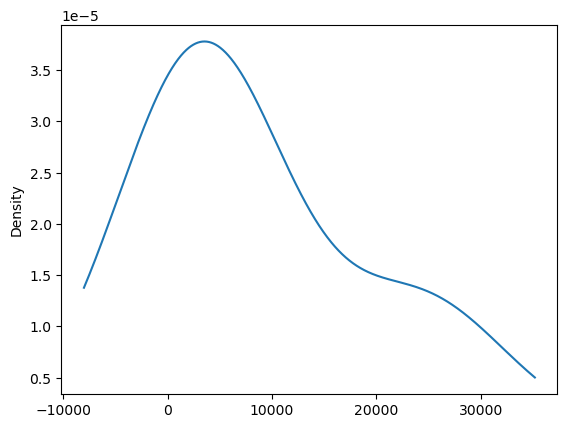

In [14]:
# Visualize the value counts of INCOME_AMT
income.plot.kde()

In [15]:
# Determine which values to replace if counts are less than 3374
replace_income=income.loc[lambda x : x<3374].index

# Replace in dataframe
for cls in replace_income:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat=['APPLICATION_TYPE', 'AFFILIATION','CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()


/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
df_merged=pd.concat([application_df, encode_df], axis=1)
df_merged.drop(application_cat, axis=1, inplace=True)
df_merged.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
X=df_merged.drop(['STATUS'], axis=1)
y=df_merged['STATUS']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

## Attempt 2: change activation function, number of neurons, epochs

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="tanh", input_dim=len(X.columns)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1950      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 2,991
Trainable params: 2,991
Non-trainable params: 0
_________________________________________________________________


2023-02-08 09:44:30.280566: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 09:44:30.281150: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization/",exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [27]:
# Train the model
fit_model = nn.fit(np.asarray(X_train_scaled), np.asarray(y_train), epochs=50,callbacks=[cp_callback])

Train on 22980 samples
Epoch 1/50

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
   32/22980 [..............................] - ETA: 28s - loss: 3.2325e-04 - accuracy: 1.0000
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
  320/22980 [..............................] - ETA: 6s - loss: 2.4248e-04 - accuracy: 1.0000 
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

 3200/22980 [===>..........................] - ETA: 3s - loss: 0.0021 - accuracy: 0.9997
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
 3488/22980 [===>..........................] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_o


Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
 6592/22980 [=======>......................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weigh

 9632/22980 [===========>..................] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
 9888/22980 [===========>..................] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_o


Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
12960/22980 [===============>..............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
13216/22980 [================>.............] - ETA: 1s - los


Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
16256/22980 [====================>.........] - ETA: 1s - loss: 0.0015 - accuracy: 0.9996
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weigh

19232/22980 [========================>.....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
19488/22980 [========================>.....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_o

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5
22592/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimization/weight


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
 2784/22980 [==>...........................] - ETA: 4s - loss: 1.9458e-04 - accuracy: 1.0000
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/w


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
 5888/22980 [======>.......................] - ETA: 3s - loss: 0.0022 - accuracy: 0.9995    
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
 6112/22980 [======>.......................] - ETA: 3s - loss: 0.0021 - accuracy: 0.9995
Epoch 00002: saving model to checkpoin


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
 9152/22980 [==========>...................] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weigh


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
12384/22980 [===============>..............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weigh


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
15456/22980 [===================>..........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
15712/22980 [===================>..........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_o


Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
18784/22980 [=======================>......] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weigh

21856/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5
22112/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimization/weights.02.hdf5

Epoch 00002: saving model to checkpoints_o


Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
 2080/22980 [=>............................] - ETA: 4s - loss: 0.0031 - accuracy: 0.9995
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
 2304/22980 [==>...........................] - ETA: 4s - loss: 0.0028 - accuracy: 0.9996
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_o


Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
 5216/22980 [=====>........................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
 5408/22980 [======>.......................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_o

 8320/22980 [=========>....................] - ETA: 3s - loss: 9.1890e-04 - accuracy: 0.9999
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
 8576/22980 [==========>...................] - ETA: 3s - loss: 9.0077e-04 - accuracy: 0.9999
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to check

11200/22980 [=============>................] - ETA: 3s - loss: 7.2683e-04 - accuracy: 0.9999
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
11296/22980 [=============>................] - ETA: 3s - loss: 7.2808e-04 - accuracy: 0.9999
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
11424/22980 [=============>................] - ETA: 3s - loss: 7.2063e-04 - accuracy: 0.9999
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: 

14080/22980 [=================>............] - ETA: 2s - loss: 9.1159e-04 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
14240/22980 [=================>............] - ETA: 2s - loss: 9.0324e-04 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
14368/22980 [=================>............] - ETA: 2s - loss: 8.9677e-04 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: 


Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
17024/22980 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998    
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
17216/22980 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoin


Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
20160/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
20224/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
20352/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00003: saving model


Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
22944/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00003: saving model to checkpoints_optimization/weights.03.hdf5
22980/22980 [==============================] - 8s 334us/sample - loss: 0.0010 - accuracy: 0.9998
Epoch 4/50

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
   32/22980 [..............................] - ETA: 5s - loss: 3.2414e-05 - accuracy: 1.0000
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

E


Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
 3136/22980 [===>..........................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9997
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
 3360/22980 [===>..........................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_o


Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
 6368/22980 [=======>......................] - ETA: 3s - loss: 9.6108e-04 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
 6592/22980 [=======>......................] - ETA: 3s - loss: 9.3900e-04 - accuracy: 0.9998
Epoch 00004: saving model to check

 9376/22980 [===========>..................] - ETA: 3s - loss: 7.1928e-04 - accuracy: 0.9999
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
 9600/22980 [===========>..................] - ETA: 3s - loss: 7.0623e-04 - accuracy: 0.9999
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to check

12512/22980 [===============>..............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
12672/22980 [===============>..............] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_o

15552/22980 [===================>..........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
15776/22980 [===================>..........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_o


Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
18688/22980 [=======================>......] - ETA: 1s - loss: 9.5335e-04 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
18944/22980 [=======================>......] - ETA: 1s - loss: 9.4206e-04 - accuracy: 0.9998
Epoch 00004: saving model to check


Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
21696/22980 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
21792/22980 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimization/weights.04.hdf5
21984/22980 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00004: saving model


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 1728/22980 [=>............................] - ETA: 7s - loss: 8.3927e-05 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 1920/22980 [=>............................] - ETA: 7s - loss: 9.8894e-05 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 4832/22980 [=====>........................] - ETA: 5s - loss: 1.2077e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 5024/22980 [=====>........................] - ETA: 5s - loss: 1.2099e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 7872/22980 [=========>....................] - ETA: 4s - loss: 1.1401e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
 8064/22980 [=========>....................] - ETA: 4s - loss: 1.2296e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check

10848/22980 [=============>................] - ETA: 3s - loss: 4.8879e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
11008/22980 [=============>................] - ETA: 3s - loss: 4.8833e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
11200/22980 [=============>........


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
14016/22980 [=================>............] - ETA: 2s - loss: 4.3003e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
14176/22980 [=================>............] - ETA: 2s - loss: 4.2579e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
17056/22980 [=====================>........] - ETA: 1s - loss: 3.7504e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
17280/22980 [=====================>........] - ETA: 1s - loss: 3.7210e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check


Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
20096/22980 [=========================>....] - ETA: 0s - loss: 5.9943e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
20320/22980 [=========================>....] - ETA: 0s - loss: 7.4333e-04 - accuracy: 0.9999
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5

Epoch 00005: saving model to check

Epoch 6/50

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
   32/22980 [..............................] - ETA: 5s - loss: 1.0028e-04 - accuracy: 1.0000
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
  224/22980 [..............................] - ETA: 6s - loss: 1.3712e-04 - accuracy: 1.0000
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving mod


Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 3008/22980 [==>...........................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 3136/22980 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 3296/22980 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9997
Epoch 00006: saving model

 6016/22980 [======>.......................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 6208/22980 [=======>......................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 6368/22980 [=======>......................

 8992/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 9152/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
 9344/22980 [===========>..................


Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
12160/22980 [==============>...............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
12384/22980 [===============>..............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_o

15168/22980 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
15392/22980 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_o


Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
18368/22980 [======================>.......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
18560/22980 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_o


Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
21440/22980 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5
21664/22980 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimization/weights.06.hdf5

Epoch 00006: saving model to checkpoints_o


Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 1568/22980 [=>............................] - ETA: 6s - loss: 2.6987e-04 - accuracy: 1.0000
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 1728/22980 [=>............................] - ETA: 6s - loss: 2.6121e-04 - accuracy: 1.0000
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to check


Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 4640/22980 [=====>........................] - ETA: 5s - loss: 6.0019e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 4736/22980 [=====>........................] - ETA: 5s - loss: 5.9337e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 4896/22980 [=====>........................] - ETA: 5s - loss: 5.7542e-04 - accuracy: 0.9998
Epoch 00007: 

 7616/22980 [========>.....................] - ETA: 4s - loss: 4.5795e-04 - accuracy: 0.9999
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
 7776/22980 [=========>....................] - ETA: 4s - loss: 4.5410e-04 - accuracy: 0.9999
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to check

10624/22980 [============>.................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9996
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
10784/22980 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9996
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
10976/22980 [=============>................


Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
13824/22980 [=================>............] - ETA: 2s - loss: 0.0010 - accuracy: 0.9997
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
13952/22980 [=================>............] - ETA: 2s - loss: 0.0010 - accuracy: 0.9997
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_o

16704/22980 [====================>.........] - ETA: 1s - loss: 8.7644e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
16896/22980 [=====================>........] - ETA: 1s - loss: 8.6684e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
17024/22980 [=====================>........] - ETA: 1s - loss: 8.6053e-04 - accuracy: 0.9998
Epoch 00007: 

19552/22980 [========================>.....] - ETA: 1s - loss: 7.6747e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
19744/22980 [========================>.....] - ETA: 1s - loss: 7.6103e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to check

22560/22980 [============================>.] - ETA: 0s - loss: 9.6515e-04 - accuracy: 0.9998
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
22720/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997    
Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimization/weights.07.hdf5
22880/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00007: savi


Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 2560/22980 [==>...........................] - ETA: 6s - loss: 2.5616e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 2656/22980 [==>...........................] - ETA: 7s - loss: 2.5329e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 2784/22980 [==>...........................] - ETA: 7s - loss: 2.4465e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: 


Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 5504/22980 [======>.......................] - ETA: 5s - loss: 2.3932e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 5664/22980 [======>.......................] - ETA: 5s - loss: 7.6036e-04 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 5792/22980 [======>.......................] - ETA: 5s - loss: 7.4693e-04 - accuracy: 0.9998
Epoch 00008: 


Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 8512/22980 [==========>...................] - ETA: 5s - loss: 5.8086e-04 - accuracy: 0.9999
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 8608/22980 [==========>...................] - ETA: 5s - loss: 5.7504e-04 - accuracy: 0.9999
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
 8768/22980 [==========>...................] - ETA: 5s - loss: 5.6691e-04 - accuracy: 0.9999
Epoch 00008: 


Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
11520/22980 [==============>...............] - ETA: 4s - loss: 6.8423e-04 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
11680/22980 [==============>...............] - ETA: 3s - loss: 6.7771e-04 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to check


Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
14400/22980 [=================>............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
14656/22980 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_o

17280/22980 [=====================>........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
17472/22980 [=====================>........] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
17600/22980 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00008: saving model

20288/22980 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
20416/22980 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5
20576/22980 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00008: saving model to checkpoints_optimization/weights.08.hdf5

Epoch 00008: saving model

  256/22980 [..............................] - ETA: 5s - loss: 0.0017 - accuracy: 1.0000    
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
  480/22980 [..............................] - ETA: 5s - loss: 0.0043 - accuracy: 0.9979
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoin


Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 3328/22980 [===>..........................] - ETA: 6s - loss: 7.4539e-04 - accuracy: 0.9997
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 3456/22980 [===>..........................] - ETA: 6s - loss: 7.2236e-04 - accuracy: 0.9997
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to check


Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 6304/22980 [=======>......................] - ETA: 5s - loss: 4.9415e-04 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 6464/22980 [=======>......................] - ETA: 5s - loss: 4.8261e-04 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to check

 9184/22980 [==========>...................] - ETA: 4s - loss: 4.0272e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 9280/22980 [===========>..................] - ETA: 4s - loss: 3.9949e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
 9472/22980 [===========>..................] - ETA: 4s - loss: 3.9235e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: 

12160/22980 [==============>...............] - ETA: 3s - loss: 3.3302e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
12320/22980 [===============>..............] - ETA: 3s - loss: 3.3115e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
12448/22980 [===============>..............] - ETA: 3s - loss: 3.2828e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: 


Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
15168/22980 [==================>...........] - ETA: 3s - loss: 2.9116e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
15296/22980 [==================>...........] - ETA: 3s - loss: 4.9621e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
15456/22980 [===================>..

18016/22980 [======================>.......] - ETA: 1s - loss: 8.0378e-04 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
18176/22980 [======================>.......] - ETA: 1s - loss: 7.9832e-04 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to check


Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
21088/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5
21280/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimization/weights.09.hdf5

Epoch 00009: saving model to checkpoints_o


Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 1088/22980 [>.............................] - ETA: 8s - loss: 8.7874e-05 - accuracy: 1.0000
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 1216/22980 [>.............................] - ETA: 8s - loss: 1.0665e-04 - accuracy: 1.0000
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to check


Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 4000/22980 [====>.........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 4224/22980 [====>.........................] - ETA: 6s - loss: 0.0010 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_o

 6976/22980 [========>.....................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 7136/22980 [========>.....................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 7328/22980 [========>.....................


Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
 9984/22980 [============>.................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
10176/22980 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_o


Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
12960/22980 [===============>..............] - ETA: 3s - loss: 8.9780e-04 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
13120/22980 [================>.............] - ETA: 3s - loss: 8.8911e-04 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to check


Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
15872/22980 [===================>..........] - ETA: 2s - loss: 7.6966e-04 - accuracy: 0.9999
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
16064/22980 [===================>..........] - ETA: 2s - loss: 7.6075e-04 - accuracy: 0.9999
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to check

18784/22980 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
18880/22980 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
19040/22980 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model

21728/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5
21888/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimization/weights.10.hdf5

Epoch 00010: saving model to checkpoints_o

 1696/22980 [=>............................] - ETA: 7s - loss: 0.0066 - accuracy: 0.9988
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 1856/22980 [=>............................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9989
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 2016/22980 [=>............................] - ETA: 7s - loss: 0.0056 - accuracy: 0.9990
Epoch 00011: saving model


Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 4672/22980 [=====>........................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9996
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 4768/22980 [=====>........................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9996
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 4960/22980 [=====>........................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 00011: saving model

 7584/22980 [========>.....................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9996
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 7680/22980 [=========>....................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9996
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
 7840/22980 [=========>....................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9996
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model


Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
10720/22980 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
10880/22980 [=============>................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_o


Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
13728/22980 [================>.............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
13856/22980 [=================>............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
13952/22980 [=================>............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 00011: saving model

16608/22980 [====================>.........] - ETA: 2s - loss: 8.9760e-04 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
16704/22980 [====================>.........] - ETA: 2s - loss: 8.9277e-04 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
16864/22980 [=====================>........] - ETA: 2s - loss: 8.8493e-04 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: 

19616/22980 [========================>.....] - ETA: 1s - loss: 7.8200e-04 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
19840/22980 [========================>.....] - ETA: 1s - loss: 7.7328e-04 - accuracy: 0.9998
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
19936/22980 [=========================>....] - ETA: 1s - loss: 9.9048e-04 - accuracy: 0.9998
Epoch 00011: 

22688/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
22944/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00011: saving model to checkpoints_optimization/weights.11.hdf5
22980/22980 [==============================] - 8s 352us/sample - loss: 0.0011 - accuracy: 0.9997
Epoch 12/50

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
   32


Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
 2944/22980 [==>...........................] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
 3168/22980 [===>..........................] - ETA: 4s - los

 5888/22980 [======>.......................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
 6112/22980 [======>.......................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_o


Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
 9088/22980 [==========>...................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
 9280/22980 [===========>..................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_o


Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
12160/22980 [==============>...............] - ETA: 2s - loss: 8.2373e-04 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
12384/22980 [===============>..............] - ETA: 2s - loss: 8.1130e-04 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to check


Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
15200/22980 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
15360/22980 [===================>..........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_o

18176/22980 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
18400/22980 [=======================>......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_o


Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
21280/22980 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5
21440/22980 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimization/weights.12.hdf5

Epoch 00012: saving model to checkpoints_o


Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 1280/22980 [>.............................] - ETA: 7s - loss: 0.0051 - accuracy: 0.9984
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 1408/22980 [>.............................] - ETA: 7s - loss: 0.0047 - accuracy: 0.9986
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_o


Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 4320/22980 [====>.........................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9995
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 4480/22980 [====>.........................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9996
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_o


Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 7296/22980 [========>.....................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9997
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
 7488/22980 [========>.....................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9997
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_o

10144/22980 [============>.................] - ETA: 4s - loss: 8.8736e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
10272/22980 [============>.................] - ETA: 4s - loss: 8.7743e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
10368/22980 [============>.................] - ETA: 4s - loss: 8.6943e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: 

13056/22980 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
13152/22980 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
13248/22980 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model

15936/22980 [===================>..........] - ETA: 2s - loss: 9.5903e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
16000/22980 [===================>..........] - ETA: 2s - loss: 9.5631e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
16224/22980 [====================>.........] - ETA: 2s - loss: 9.4615e-04 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: 


Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
18880/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
19072/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_o


Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
21856/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
21984/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimization/weights.13.hdf5
22112/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00013: saving model


Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 1824/22980 [=>............................] - ETA: 7s - loss: 1.7821e-04 - accuracy: 1.0000
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 1984/22980 [=>............................] - ETA: 7s - loss: 1.7490e-04 - accuracy: 1.0000
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to check


Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 4672/22980 [=====>........................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9996
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 4768/22980 [=====>........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9996
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 4896/22980 [=====>........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9996
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model

 7616/22980 [========>.....................] - ETA: 5s - loss: 9.4100e-04 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 7776/22980 [=========>....................] - ETA: 5s - loss: 9.2486e-04 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
 7904/22980 [=========>....................] - ETA: 5s - loss: 9.1112e-04 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: 

10560/22980 [============>.................] - ETA: 4s - loss: 7.1937e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
10720/22980 [============>.................] - ETA: 4s - loss: 7.1041e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
10912/22980 [=============>........

13536/22980 [================>.............] - ETA: 3s - loss: 5.8890e-04 - accuracy: 0.9999
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
13696/22980 [================>.............] - ETA: 3s - loss: 5.8278e-04 - accuracy: 0.9999
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
13856/22980 [=================>............] - ETA: 3s - loss: 5.7618e-04 - accuracy: 0.9999
Epoch 00014: 


Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
16512/22980 [====================>.........] - ETA: 2s - loss: 8.8798e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
16640/22980 [====================>.........] - ETA: 2s - loss: 8.8198e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
16736/22980 [====================>.........] - ETA: 2s - loss: 8.7725e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: 

19360/22980 [========================>.....] - ETA: 1s - loss: 8.1274e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
19520/22980 [========================>.....] - ETA: 1s - loss: 8.0702e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
19680/22980 [========================>.....] - ETA: 1s - loss: 8.0120e-04 - accuracy: 0.9998
Epoch 00014: 

22368/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
22496/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5
22656/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00014: saving model to checkpoints_optimization/weights.14.hdf5

Epoch 00014: saving model


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 2464/22980 [==>...........................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9996    
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 2688/22980 [==>...........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9996
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoin


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 5440/22980 [======>.......................] - ETA: 5s - loss: 8.5553e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 5664/22980 [======>.......................] - ETA: 5s - loss: 9.4993e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to check


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 8480/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9996
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
 8608/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9997
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_o


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
11328/22980 [=============>................] - ETA: 4s - loss: 9.1070e-04 - accuracy: 0.9997
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
11456/22980 [=============>................] - ETA: 3s - loss: 9.0469e-04 - accuracy: 0.9997
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to check


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
14336/22980 [=================>............] - ETA: 3s - loss: 7.5780e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
14560/22980 [==================>...........] - ETA: 2s - loss: 7.4893e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to check


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
17376/22980 [=====================>........] - ETA: 1s - loss: 6.5528e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
17504/22980 [=====================>........] - ETA: 1s - loss: 6.5105e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
17664/22980 [======================>.......] - ETA: 1s - loss: 6.4581e-04 - accuracy: 0.9998
Epoch 00015: 


Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
20480/22980 [=========================>....] - ETA: 0s - loss: 8.5320e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5
20640/22980 [=========================>....] - ETA: 0s - loss: 8.4808e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimization/weights.15.hdf5

Epoch 00015: saving model to check

  448/22980 [..............................] - ETA: 6s - loss: 0.0084 - accuracy: 0.9978
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
  608/22980 [..............................] - ETA: 6s - loss: 0.0063 - accuracy: 0.9984
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
  800/22980 [>.............................

 3456/22980 [===>..........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
 3552/22980 [===>..........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
 3680/22980 [===>..........................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model

 6400/22980 [=======>......................] - ETA: 5s - loss: 8.0369e-04 - accuracy: 0.9998
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
 6560/22980 [=======>......................] - ETA: 5s - loss: 7.8488e-04 - accuracy: 0.9998
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to check


Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
 9472/22980 [===========>..................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weigh


Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
12480/22980 [===============>..............] - ETA: 3s - loss: 9.4254e-04 - accuracy: 0.9998
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
12704/22980 [===============>..............] - ETA: 3s - loss: 9.3017e-04 - accuracy: 0.9998
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to check

15488/22980 [===================>..........] - ETA: 2s - loss: 8.4251e-04 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
15680/22980 [===================>..........] - ETA: 2s - loss: 8.3256e-04 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
15776/22980 [===================>..........] - ETA: 2s - loss: 8.2831e-04 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: 


Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
18496/22980 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
18688/22980 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_o

21472/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
21568/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5
21760/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00016: saving model to checkpoints_optimization/weights.16.hdf5

Epoch 00016: saving model

 1376/22980 [>.............................] - ETA: 8s - loss: 2.6019e-04 - accuracy: 1.0000
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
 1536/22980 [=>............................] - ETA: 8s - loss: 2.8051e-04 - accuracy: 1.0000
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to check


Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
 4576/22980 [====>.........................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
 4672/22980 [=====>........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_o


Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
 7488/22980 [========>.....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9999
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
 7712/22980 [=========>....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9999
Epoch 00017: saving model to checkpoints_o


Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
10496/22980 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
10624/22980 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_o

13312/22980 [================>.............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
13440/22980 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
13600/22980 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model

16224/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
16384/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
16512/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model

19200/22980 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
19392/22980 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_o

22240/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5
22432/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimization/weights.17.hdf5

Epoch 00017: saving model to checkpoints_o


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 2368/22980 [==>...........................] - ETA: 6s - loss: 0.0020 - accuracy: 0.9992
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 2528/22980 [==>...........................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9992
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 2656/22980 [==>...........................


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 5376/22980 [======>.......................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9996
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 5536/22980 [======>.......................] - ETA: 5s - loss: 0.0010 - accuracy: 0.9996
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_o


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 8416/22980 [=========>....................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9996
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 8544/22980 [==========>...................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9996
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
 8640/22980 [==========>...................


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
11360/22980 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9996
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
11552/22980 [==============>...............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_o


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
14400/22980 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
14624/22980 [==================>...........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_o


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
17344/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
17536/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_o


Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
20448/22980 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
20576/22980 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimization/weights.18.hdf5
20736/22980 [==========================>...

  352/22980 [..............................] - ETA: 7s - loss: 1.4128e-04 - accuracy: 1.0000
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
  448/22980 [..............................] - ETA: 8s - loss: 1.2651e-04 - accuracy: 1.0000
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
  640/22980 [..............................] - ETA: 8s - loss: 1.1192e-04 - accuracy: 1.0000
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: 

 3296/22980 [===>..........................] - ETA: 7s - loss: 6.6826e-04 - accuracy: 0.9994
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 3424/22980 [===>..........................] - ETA: 7s - loss: 6.4846e-04 - accuracy: 0.9994
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 3584/22980 [===>..........................] - ETA: 7s - loss: 6.2233e-04 - accuracy: 0.9994
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: 

 6304/22980 [=======>......................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9995
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 6432/22980 [=======>......................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9995
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 6560/22980 [=======>......................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9995
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model


Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 9312/22980 [===========>..................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9996
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
 9472/22980 [===========>..................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9996
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_o


Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
12256/22980 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9996
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
12448/22980 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9996
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_o


Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
15104/22980 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
15200/22980 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
15360/22980 [===================>..........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model


Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
18048/22980 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
18304/22980 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_o


Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
21184/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimization/weights.19.hdf5
21312/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00019: saving model to checkpoints_o

  864/22980 [>.............................] - ETA: 10s - loss: 1.9165e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
 1024/22980 [>.............................] - ETA: 10s - loss: 1.8055e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
 1120/22980 [>.............................] - ETA: 10s - loss: 1.7261e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 0002


Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
 3872/22980 [====>.........................] - ETA: 7s - loss: 2.0724e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
 4064/22980 [====>.........................] - ETA: 7s - loss: 2.0222e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to check

 6944/22980 [========>.....................] - ETA: 5s - loss: 6.9279e-04 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
 7136/22980 [========>.....................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9996    
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to check

 9984/22980 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
10112/22980 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
10336/22980 [============>.................

13056/22980 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9996
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
13184/22980 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9996
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
13376/22980 [================>.............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9996
Epoch 00020: saving model

16032/22980 [===================>..........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
16256/22980 [====================>.........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_o


Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
18976/22980 [=======================>......] - ETA: 1s - loss: 8.7746e-04 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
19072/22980 [=======================>......] - ETA: 1s - loss: 8.7380e-04 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
19200/22980 [========================>.....] - ETA: 1s - loss: 8.7194e-04 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: 


Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
21952/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5
22080/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimization/weights.20.hdf5

Epoch 00020: saving model to checkpoints_o

 1632/22980 [=>............................] - ETA: 11s - loss: 1.6957e-04 - accuracy: 1.0000
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 1760/22980 [=>............................] - ETA: 10s - loss: 1.6384e-04 - accuracy: 1.0000
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 1888/22980 [=>............................] - ETA: 10s - loss: 1.6751e-04 - accuracy: 1.0000
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 0002

 4480/22980 [====>.........................] - ETA: 8s - loss: 0.0017 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 4640/22980 [=====>........................] - ETA: 8s - loss: 0.0017 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 4800/22980 [=====>........................] - ETA: 8s - loss: 0.0016 - accuracy: 0.9998
Epoch 00021: saving model


Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 7456/22980 [========>.....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
 7616/22980 [========>.....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_o


Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
10240/22980 [============>.................] - ETA: 5s - loss: 8.4051e-04 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
10464/22980 [============>.................] - ETA: 5s - loss: 8.2658e-04 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to check


Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
13248/22980 [================>.............] - ETA: 4s - loss: 8.9359e-04 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
13408/22980 [================>.............] - ETA: 4s - loss: 8.8378e-04 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
13472/22980 [================>.....

15968/22980 [===================>..........] - ETA: 3s - loss: 7.6683e-04 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
16096/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998    
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
16192/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: savi


Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
18912/22980 [=======================>......] - ETA: 1s - loss: 9.7677e-04 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
19072/22980 [=======================>......] - ETA: 1s - loss: 9.7018e-04 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to check

21664/22980 [===========================>..] - ETA: 0s - loss: 8.7097e-04 - accuracy: 0.9999
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
21792/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998    
Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimization/weights.21.hdf5
21984/22980 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00021: savi

 1504/22980 [>.............................] - ETA: 8s - loss: 6.1727e-04 - accuracy: 0.9993
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 1664/22980 [=>............................] - ETA: 8s - loss: 5.8390e-04 - accuracy: 0.9994
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 1856/22980 [=>....................

 4352/22980 [====>.........................] - ETA: 7s - loss: 3.8212e-04 - accuracy: 0.9998
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 4480/22980 [====>.........................] - ETA: 7s - loss: 3.7757e-04 - accuracy: 0.9998
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 4672/22980 [=====>........................] - ETA: 7s - loss: 3.6757e-04 - accuracy: 0.9998
Epoch 00022: 

 7296/22980 [========>.....................] - ETA: 5s - loss: 9.5548e-04 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 7456/22980 [========>.....................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9996    
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
 7584/22980 [========>.....................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9996
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: savi


Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
10208/22980 [============>.................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9995
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
10368/22980 [============>.................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9995
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
10464/22980 [============>.................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9995
Epoch 00022: saving model

12992/22980 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9996
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
13216/22980 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9996
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_o


Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
15968/22980 [===================>..........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
16096/22980 [====================>.........] - ETA: 2s - loss: 9.9453e-04 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
16224/22980 [====================>.........] - ETA: 2s - loss: 9.8689e-04 - accuracy: 0.9997
Epoch 00022: savi

19008/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
19232/22980 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_o


Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5
22240/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimization/weigh

 2144/22980 [=>............................] - ETA: 6s - loss: 1.5256e-04 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 2304/22980 [==>...........................] - ETA: 6s - loss: 1.6065e-04 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 2496/22980 [==>...................


Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 5344/22980 [=====>........................] - ETA: 5s - loss: 8.7942e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 5568/22980 [======>.......................] - ETA: 5s -

 8224/22980 [=========>....................] - ETA: 4s - loss: 7.1709e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 8384/22980 [=========>....................] - ETA: 4s - loss: 7.0773e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
 8544/22980 [==========>...................] - ETA: 4s - loss: 7.0023e-04 - accuracy: 0.9998
Epoch 00023: 

11072/22980 [=============>................] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997    
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
11200/22980 [=============>................] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
11360/22980 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9997
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving m


Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
14112/22980 [=================>............] - ETA: 3s - loss: 9.4699e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
14240/22980 [=================>............] - ETA: 2s - loss: 9.3871e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to check


Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
16992/22980 [=====================>........] - ETA: 2s - loss: 8.5859e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
17120/22980 [=====================>........] - ETA: 2s - loss: 8.5287e-04 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
17280/22980 [=====================>


Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
19904/22980 [========================>.....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9997
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
20032/22980 [=========================>....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
20128/22980 [=========================>....


Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
22784/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
22912/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimization/weights.23.hdf5
22980/22980 [==============================] - 8s 361us/sample - loss: 0.0010 - accuracy: 0.9997
Epoch 24/50

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
   32/22980 [..............................] - ETA: 15s - loss: 1.0900e-05 - accuracy: 1.0000
Epoch 00024: saving model to checkpoints_optimization


Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 2624/22980 [==>...........................] - ETA: 8s - loss: 0.0016 - accuracy: 0.9996
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 2752/22980 [==>...........................] - ETA: 8s - loss: 0.0015 - accuracy: 0.9996
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 2880/22980 [==>...........................] - ETA: 8s - loss: 0.0014 - accuracy: 0.9997
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model


Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 5408/22980 [======>.......................] - ETA: 8s - loss: 9.7492e-04 - accuracy: 0.9996
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 5504/22980 [======>.......................] - ETA: 8s - loss: 9.6071e-04 - accuracy: 0.9996
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 5568/22980 [======>.......................] - ETA: 8s - loss: 9.5015e-04 - accuracy: 0.9996
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: 

 8096/22980 [=========>....................] - ETA: 8s - loss: 7.3386e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 8192/22980 [=========>....................] - ETA: 8s - loss: 7.2679e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
 8384/22980 [=========>....................] - ETA: 7s - loss: 7.1076e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: 

11232/22980 [=============>................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9997
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
11392/22980 [=============>................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9997
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
11456/22980 [=============>................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9997
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model


Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
14240/22980 [=================>............] - ETA: 3s - loss: 9.3553e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
14464/22980 [=================>............] - ETA: 3s - loss: 9.2332e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to check

17248/22980 [=====================>........] - ETA: 2s - loss: 8.0288e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
17344/22980 [=====================>........] - ETA: 2s - loss: 7.9898e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
17536/22980 [=====================>........] - ETA: 2s - loss: 7.9102e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: 


Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
20288/22980 [=========================>....] - ETA: 1s - loss: 7.4161e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
20448/22980 [=========================>....] - ETA: 1s - loss: 8.8578e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5
20544/22980 [=========================>....] - ETA: 1s - loss: 8.8226e-04 - accuracy: 0.9998
Epoch 00024: saving model to checkpoints_optimization/weights.24.hdf5

Epoch 00024: 

  224/22980 [..............................] - ETA: 6s - loss: 2.3669e-04 - accuracy: 1.0000
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
  448/22980 [..............................] - ETA: 5s - loss: 1.3526e-04 - accuracy: 1.0000
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to check

 3136/22980 [===>..........................] - ETA: 7s - loss: 1.5970e-04 - accuracy: 1.0000
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
 3392/22980 [===>..........................] - ETA: 7s - loss: 1.5725e-04 - accuracy: 1.0000
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to check

 6176/22980 [=======>......................] - ETA: 5s - loss: 9.7409e-04 - accuracy: 0.9998
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
 6368/22980 [=======>......................] - ETA: 5s - loss: 9.4904e-04 - accuracy: 0.9998
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to check

 9248/22980 [===========>..................] - ETA: 4s - loss: 6.9749e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
 9472/22980 [===========>..................] - ETA: 4s - loss: 6.8664e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to check

12224/22980 [==============>...............] - ETA: 3s - loss: 5.7870e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
12416/22980 [===============>..............] - ETA: 3s - loss: 5.7061e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
12576/22980 [===============>......


Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
15296/22980 [==================>...........] - ETA: 2s - loss: 4.8896e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
15456/22980 [===================>..........] - ETA: 2s - loss: 4.8446e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
15520/22980 [===================>..........] - ETA: 2s - loss: 4.8318e-04 - accuracy: 0.9999
Epoch 00025: 


Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
18144/22980 [======================>.......] - ETA: 1s - loss: 5.9915e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
18208/22980 [======================>.......] - ETA: 1s - loss: 5.9708e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
18336/22980 [======================>.......] - ETA: 1s - loss: 5.9297e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: 

20992/22980 [==========================>...] - ETA: 0s - loss: 7.5303e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5
21216/22980 [==========================>...] - ETA: 0s - loss: 7.8765e-04 - accuracy: 0.9998
Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimization/weights.25.hdf5

Epoch 00025: saving model to check


Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 1024/22980 [>.............................] - ETA: 8s - loss: 1.6293e-04 - accuracy: 1.0000
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 1184/22980 [>.............................] - ETA: 8s - loss: 1.5129e-04 - accuracy: 1.0000
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to check


Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 4032/22980 [====>.........................] - ETA: 7s - loss: 0.0014 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 4160/22980 [====>.........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_o

 6752/22980 [=======>......................] - ETA: 7s - loss: 0.0011 - accuracy: 0.9997
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 6848/22980 [=======>......................] - ETA: 7s - loss: 0.0011 - accuracy: 0.9997
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 6944/22980 [========>.....................] - ETA: 7s - loss: 0.0011 - accuracy: 0.9997
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 7072/22980 [========>....


Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 9728/22980 [===========>..................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9997
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
 9920/22980 [===========>..................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9997
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
10016/22980 [============>.................

12672/22980 [===============>..............] - ETA: 4s - loss: 9.7855e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
12832/22980 [===============>..............] - ETA: 4s - loss: 9.6875e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
12992/22980 [===============>..............] - ETA: 4s - loss: 9.5913e-04 - accuracy: 0.9998
Epoch 00026: 


Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
15648/22980 [===================>..........] - ETA: 3s - loss: 8.1778e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
15808/22980 [===================>..........] - ETA: 2s - loss: 8.1460e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to check

18368/22980 [======================>.......] - ETA: 1s - loss: 7.1606e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
18592/22980 [=======================>......] - ETA: 1s - loss: 7.0947e-04 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to check

21312/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998    
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
21472/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimization/weights.26.hdf5
21664/22980 [==========================

 1280/22980 [>.............................] - ETA: 8s - loss: 1.0588e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 1408/22980 [>.............................] - ETA: 8s - loss: 1.3793e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 1504/22980 [>.............................] - ETA: 8s - loss: 1.3525e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 1568/22980 [=>............................] - ETA: 9s - loss: 1.3139e-04 - accuracy:

 4192/22980 [====>.........................] - ETA: 6s - loss: 3.0546e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 4320/22980 [====>.........................] - ETA: 6s - loss: 2.9974e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 4448/22980 [====>.........................] - ETA: 6s - loss: 2.9509e-04 - accuracy: 1.0000
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: 


Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 7168/22980 [========>.....................] - ETA: 5s - loss: 6.2894e-04 - accuracy: 0.9999
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 7264/22980 [========>.....................] - ETA: 5s - loss: 6.2075e-04 - accuracy: 0.9999
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 7328/22980 [========>.....................] - ETA: 5s - loss: 6.1618e-04 - accuracy: 0.9999
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
 7424/22980 [========>.....................] - ETA: 5s - loss: 6.0910e-04 - accuracy:


Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
10112/22980 [============>.................] - ETA: 4s - loss: 5.0534e-04 - accuracy: 0.9999
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
10304/22980 [============>.................] - ETA: 4s - loss: 4.9922e-04 - accuracy: 0.9999
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
10432/22980 [============>.........

13024/22980 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
13152/22980 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
13344/22980 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 00027: saving model

16064/22980 [===================>..........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
16192/22980 [====================>.........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
16352/22980 [====================>.........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model


Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
19008/22980 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
19168/22980 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_o


Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
22112/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5
22208/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00027: saving model to checkpoints_optimization/weights.27.hdf5

Epoch 00027: saving model to checkpoints_o


Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 1920/22980 [=>............................] - ETA: 9s - loss: 5.0529e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 2112/22980 [=>............................] - ETA: 8s - loss: 4.7803e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 2208/22980 [=>............................] - ETA: 9s - loss: 4.8913e-04 - accuracy: 1.0000
Epoch 00028: 

 4864/22980 [=====>........................] - ETA: 7s - loss: 2.7694e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 5024/22980 [=====>........................] - ETA: 7s - loss: 2.7245e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 5152/22980 [=====>........................] - ETA: 6s - loss: 2.6970e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: 


Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 8096/22980 [=========>....................] - ETA: 5s - loss: 8.6140e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 8224/22980 [=========>....................] - ETA: 5s - loss: 8.5391e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
 8288/22980 [=========>....................] - ETA: 5s - loss: 8.4784e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: 


Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
11200/22980 [=============>................] - ETA: 4s - loss: 6.6365e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
11392/22980 [=============>................] - ETA: 3s - loss: 6.5296e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to check


Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
14368/22980 [=================>............] - ETA: 2s - loss: 9.2095e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/w

17248/22980 [=====================>........] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
17472/22980 [=====================>........] - ETA: 1s - loss: 9.9931e-04 - accuracy: 0.9998
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoin


Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
20320/22980 [=========================>....] - ETA: 0s - loss: 8.8122e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5
20512/22980 [=========================>....] - ETA: 0s - loss: 8.7392e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimization/weights.28.hdf5

Epoch 00028: saving model to check


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
  448/22980 [..............................] - ETA: 6s - loss: 9.2350e-05 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
  608/22980 [..............................] - ETA: 6s - loss: 8.2112e-05 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to check


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 3232/22980 [===>..........................] - ETA: 8s - loss: 2.0657e-04 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 3392/22980 [===>..........................] - ETA: 8s - loss: 2.0213e-04 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 3456/22980 [===>..........................] - ETA: 8s - loss: 2.2065e-04 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: 


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 6336/22980 [=======>......................] - ETA: 6s - loss: 2.1545e-04 - accuracy: 1.0000
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 6560/22980 [=======>......................] - ETA: 6s - loss: 2.0991e-04 - accuracy: 1.0000
Epoch 00029: saving model to check

 9184/22980 [==========>...................] - ETA: 5s - loss: 6.0179e-04 - accuracy: 0.9999
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 9248/22980 [===========>..................] - ETA: 5s - loss: 5.9769e-04 - accuracy: 0.9999
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
 9440/22980 [===========>..................] - ETA: 5s - loss: 5.8736e-04 - accuracy: 0.9999
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: 

12096/22980 [==============>...............] - ETA: 4s - loss: 9.0265e-04 - accuracy: 0.9998
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
12288/22980 [===============>..............] - ETA: 3s - loss: 8.9246e-04 - accuracy: 0.9998
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
12448/22980 [===============>......


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
15104/22980 [==================>...........] - ETA: 2s - loss: 8.2409e-04 - accuracy: 0.9998
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
15264/22980 [==================>...........] - ETA: 2s - loss: 8.1606e-04 - accuracy: 0.9998
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to check


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
18112/22980 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
18368/22980 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_o


Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
21184/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
21312/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimization/weights.29.hdf5
21472/22980 [===========================>..


Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
 1216/22980 [>.............................] - ETA: 6s - loss: 2.0026e-04 - accuracy: 1.0000
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
 1376/22980 [>.............................] - ETA: 6s - loss: 1.8582e-04 - accuracy: 1.0000
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to check


Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
 4352/22980 [====>.........................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weigh

 7168/22980 [========>.....................] - ETA: 4s - loss: 8.5362e-04 - accuracy: 0.9999
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
 7232/22980 [========>.....................] - ETA: 4s - loss: 8.5577e-04 - accuracy: 0.9999
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
 7392/22980 [========>.....................] - ETA: 4s - loss: 8.4066e-04 - accuracy: 0.9999
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: 


Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
10144/22980 [============>.................] - ETA: 4s - loss: 9.3967e-04 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
10208/22980 [============>.................] - ETA: 4s - loss: 9.3460e-04 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
10464/22980 [============>.........

13056/22980 [================>.............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
13344/22980 [================>.............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_o


Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
16256/22980 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
16352/22980 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
16416/22980 [====================>.........


Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
19136/22980 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
19232/22980 [========================>.....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
19360/22980 [========================>.....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00030: saving model

21888/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5
22080/22980 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimization/weights.30.hdf5

Epoch 00030: saving model to checkpoints_o


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 1952/22980 [=>............................] - ETA: 7s - loss: 1.4519e-04 - accuracy: 1.0000
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 2080/22980 [=>............................] - ETA: 7s - loss: 1.3957e-04 - accuracy: 1.0000
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 2272/22980 [=>....................


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 5120/22980 [=====>........................] - ETA: 5s - loss: 4.5123e-04 - accuracy: 0.9996
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 5344/22980 [=====>........................] - ETA: 5s -

 8192/22980 [=========>....................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9995
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 8384/22980 [=========>....................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9994
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
 8544/22980 [==========>...................


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
11360/22980 [=============>................] - ETA: 3s - loss: 0.0019 - accuracy: 0.9995
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
11616/22980 [==============>...............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9995
Epoch 00031: saving model to checkpoints_o

14208/22980 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9996
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
14368/22980 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9996
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
14528/22980 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9996
Epoch 00031: saving model


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
17280/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
17376/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
17504/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
20064/22980 [=========================>....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
20256/22980 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_o


Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
22880/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimization/weights.31.hdf5
22980/22980 [==============================] - 9s 377us/sample - loss: 0.0010 - accuracy: 0.9997
Epoch 32/50

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
   32/22980 [..............................] - ETA: 6s - loss: 3.0686e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5




Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
 2752/22980 [==>...........................] - ETA: 7s - loss: 1.4292e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
 2944/22980 [==>...........................] - ETA: 7s - loss: 1.5846e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to check

 5664/22980 [======>.......................] - ETA: 6s - loss: 1.3691e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
 5888/22980 [======>.......................] - ETA: 6s - loss: 1.3572e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to check

 8576/22980 [==========>...................] - ETA: 5s - loss: 1.2980e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
 8704/22980 [==========>...................] - ETA: 5s - loss: 1.2865e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
 8832/22980 [==========>...................] - ETA: 5s - loss: 1.2920e-04 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: 


Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
11712/22980 [==============>...............] - ETA: 4s - loss: 2.0057e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
11968/22980 [==============>...............] - ETA: 3s -


Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
14720/22980 [==================>...........] - ETA: 2s - loss: 4.0677e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
14880/22980 [==================>...........] - ETA: 2s - loss: 4.0294e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to check

17664/22980 [======================>.......] - ETA: 1s - loss: 9.5573e-04 - accuracy: 0.9998
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
17824/22980 [======================>.......] - ETA: 1s - loss: 9.4808e-04 - accuracy: 0.9998
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
17952/22980 [======================>.......] - ETA: 1s - loss: 9.4189e-04 - accuracy: 0.9998
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: 

20704/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998    
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5
20928/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimization/weights.32.hdf5

Epoch 00032: saving model to checkpoin


Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
  800/22980 [>.............................] - ETA: 7s - loss: 3.4844e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
  896/22980 [>.............................] - ETA: 8s - loss: 3.3428e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 1088/22980 [>.....................


Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 3776/22980 [===>..........................] - ETA: 6s - loss: 1.7325e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 3936/22980 [====>.........................] - ETA: 6s - loss: 1.7317e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 4064/22980 [====>.........................] - ETA: 6s - loss: 1.7679e-04 - accuracy: 1.0000
Epoch 00033: 

 6656/22980 [=======>......................] - ETA: 5s - loss: 1.9174e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 6816/22980 [=======>......................] - ETA: 5s - loss: 1.8888e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 6912/22980 [========>.....................] - ETA: 5s - loss: 1.8807e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: 

 9440/22980 [===========>..................] - ETA: 5s - loss: 1.6438e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
 9600/22980 [===========>..................] - ETA: 5s - loss: 1.6247e-04 - accuracy: 1.0000
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to check

12288/22980 [===============>..............] - ETA: 4s - loss: 9.3648e-04 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
12416/22980 [===============>..............] - ETA: 4s - loss: 9.2764e-04 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
12576/22980 [===============>..............] - ETA: 4s - loss: 9.1623e-04 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: 

15104/22980 [==================>...........] - ETA: 3s - loss: 7.8254e-04 - accuracy: 0.9999
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
15232/22980 [==================>...........] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998    
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
15392/22980 [===================>..........] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: savi

18080/22980 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
18176/22980 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
18336/22980 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model


Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
21280/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimization/weights.33.hdf5
21568/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00033: saving model to checkpoints_o


Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 1312/22980 [>.............................] - ETA: 8s - loss: 1.1546e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 1472/22980 [>.............................] - ETA: 7s - loss: 1.5783e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 1632/22980 [=>....................


Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 4384/22980 [====>.........................] - ETA: 6s - loss: 1.4711e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 4448/22980 [====>.........................] - ETA: 6s - loss: 1.5070e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to check

 7168/22980 [========>.....................] - ETA: 5s - loss: 1.5632e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 7296/22980 [========>.....................] - ETA: 5s - loss: 1.5582e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 7392/22980 [========>.....................] - ETA: 5s - loss: 1.5722e-04 - accuracy: 1.0000
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
 7488/22980 [=


Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
10080/22980 [============>.................] - ETA: 4s - loss: 5.5117e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
10176/22980 [============>.................] - ETA: 4s - loss: 5.4689e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
10336/22980 [============>.................] - ETA: 4s - loss: 5.4025e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: 

12992/22980 [===============>..............] - ETA: 3s - loss: 4.7460e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
13184/22980 [================>.............] - ETA: 3s - loss: 4.6929e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to check

16000/22980 [===================>..........] - ETA: 2s - loss: 7.6557e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
16064/22980 [===================>..........] - ETA: 2s - loss: 7.6256e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
16192/22980 [====================>.........] - ETA: 2s - loss: 7.5880e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
16320/22980 [=


Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
18944/22980 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
19168/22980 [========================>.....] - ETA: 1s - loss: 9.9415e-04 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoin


Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
22016/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
22176/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimization/weights.34.hdf5
22336/22980 [============================>.


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 1952/22980 [=>............................] - ETA: 8s - loss: 2.1802e-04 - accuracy: 1.0000
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 2144/22980 [=>............................] - ETA: 8s - loss: 2.0721e-04 - accuracy: 1.0000
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to check


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 4960/22980 [=====>........................] - ETA: 7s - loss: 3.5622e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 5088/22980 [=====>........................] - ETA: 7s - loss: 3.6374e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to check


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 7968/22980 [=========>....................] - ETA: 5s - loss: 6.7404e-04 - accuracy: 0.9997
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
 8128/22980 [=========>....................] - ETA: 5s - loss: 6.6253e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to check


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
10976/22980 [=============>................] - ETA: 4s - loss: 5.3568e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
11136/22980 [=============>................] - ETA: 4s - loss: 5.2902e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to check


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
13952/22980 [=================>............] - ETA: 3s - loss: 4.3815e-04 - accuracy: 0.9999
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
14080/22980 [=================>............] - ETA: 3s - loss: 4.3482e-04 - accuracy: 0.9999
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
14240/22980 [=================>....


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
16928/22980 [=====================>........] - ETA: 2s - loss: 3.8355e-04 - accuracy: 0.9999
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
17056/22980 [=====================>........] - ETA: 2s - loss: 3.8090e-04 - accuracy: 0.9999
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to check

19776/22980 [========================>.....] - ETA: 1s - loss: 8.7903e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
19904/22980 [========================>.....] - ETA: 1s - loss: 8.7569e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
20000/22980 [=========================>....] - ETA: 1s - loss: 8.7214e-04 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: 


Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
22880/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimization/weights.35.hdf5
22980/22980 [==============================] - 8s 359us/sample - loss: 0.0010 - accuracy: 0.9998
Epoch 36/50

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
   32/22980 [..............................] - ETA: 4s - loss: 1.5866e-05 - accuracy: 1.0000
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5




Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 2912/22980 [==>...........................] - ETA: 6s - loss: 1.3684e-04 - accuracy: 1.0000
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 3072/22980 [===>..........................] - ETA: 6s - loss: 1.3810e-04 - accuracy: 1.0000
Epoch 00036: saving model to check


Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 5792/22980 [======>.......................] - ETA: 6s - loss: 7.9221e-04 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 5888/22980 [======>.......................] - ETA: 6s - loss: 7.8147e-04 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 6080/22980 [======>...............


Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 8672/22980 [==========>...................] - ETA: 5s - loss: 5.7151e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 8736/22980 [==========>...................] - ETA: 5s - loss: 5.6783e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 8832/22980 [==========>...................] - ETA: 5s - loss: 5.6320e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
 8960/22980 [=


Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
11808/22980 [==============>...............] - ETA: 4s - loss: 5.2483e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
12096/22980 [==============>...............] - ETA: 4s - loss: 5.1398e-04 - accuracy: 0.9999
Epoch 00036: saving model to check

14688/22980 [==================>...........] - ETA: 3s - loss: 5.1449e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
14912/22980 [==================>...........] - ETA: 3s - loss: 5.0815e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to check


Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
17600/22980 [=====================>........] - ETA: 2s - loss: 7.3753e-04 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
17696/22980 [======================>.......] - ETA: 2s - loss: 7.3444e-04 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
17824/22980 [======================>.......] - ETA: 2s - loss: 7.2923e-04 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: 

20512/22980 [=========================>....] - ETA: 0s - loss: 6.4632e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5
20736/22980 [==========================>...] - ETA: 0s - loss: 6.3989e-04 - accuracy: 0.9999
Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimization/weights.36.hdf5

Epoch 00036: saving model to check

  448/22980 [..............................] - ETA: 5s - loss: 1.5302e-04 - accuracy: 1.0000
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
  704/22980 [..............................] - ETA: 5s - loss: 1.2970e-04 - accuracy: 1.0000
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to check


Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 3520/22980 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 3648/22980 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 3712/22980 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model


Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 6496/22980 [=======>......................] - ETA: 5s - loss: 7.2258e-04 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 6720/22980 [=======>......................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997    
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to check

 9504/22980 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
 9696/22980 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_o

12576/22980 [===============>..............] - ETA: 3s - loss: 9.9914e-04 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
12704/22980 [===============>..............] - ETA: 3s - loss: 9.9141e-04 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
12896/22980 [===============>..............] - ETA: 3s - loss: 9.7735e-04 - accuracy: 0.9998
Epoch 00037: 

15552/22980 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
15680/22980 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
15808/22980 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model


Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
18624/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
18784/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_o

21536/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
21664/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimization/weights.37.hdf5
21856/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00037: saving model


Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 1472/22980 [>.............................] - ETA: 9s - loss: 2.5659e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 1600/22980 [=>............................] - ETA: 8s - loss: 2.5680e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 1728/22980 [=>............................] - ETA: 9s - loss: 2.5936e-04 - accuracy: 1.0000
Epoch 00038: 

 4288/22980 [====>.........................] - ETA: 7s - loss: 3.3720e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 4384/22980 [====>.........................] - ETA: 7s - loss: 3.3044e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 4512/22980 [====>.........................] - ETA: 7s - loss: 3.2241e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: 


Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 7392/22980 [========>.....................] - ETA: 5s - loss: 2.3049e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
 7584/22980 [========>.....................] - ETA: 5s - loss: 2.2588e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to check

10336/22980 [============>.................] - ETA: 4s - loss: 1.9335e-04 - accuracy: 1.0000
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
10464/22980 [============>.................] - ETA: 4s - loss: 5.0777e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
10528/22980 [============>.................] - ETA: 4s - loss: 5.0522e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: 

13184/22980 [================>.............] - ETA: 3s - loss: 4.2749e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
13408/22980 [================>.............] - ETA: 3s - loss: 4.2153e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to check

16160/22980 [====================>.........] - ETA: 2s - loss: 3.6422e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
16352/22980 [====================>.........] - ETA: 2s - loss: 3.6074e-04 - accuracy: 0.9999
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
16512/22980 [====================>.

19200/22980 [========================>.....] - ETA: 1s - loss: 6.9299e-04 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
19296/22980 [========================>.....] - ETA: 1s - loss: 6.8985e-04 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
19456/22980 [========================>.....] - ETA: 1s - loss: 6.8438e-04 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: 

22208/22980 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
22336/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5
22464/22980 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimization/weights.38.hdf5

Epoch 00038: saving model


Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 2208/22980 [=>............................] - ETA: 5s - loss: 0.0024 - accuracy: 0.9995
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 2368/22980 [==>...........................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9996
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_o


Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 5440/22980 [======>.......................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9994
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 5600/22980 [======>.......................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9995
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_o


Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 8544/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9996
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
 8768/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_o

11520/22980 [==============>...............] - ETA: 3s - loss: 8.8731e-04 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
11680/22980 [==============>...............] - ETA: 3s - loss: 8.7558e-04 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
11776/22980 [==============>...............] - ETA: 3s - loss: 8.6953e-04 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: 


Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
14560/22980 [==================>...........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9996
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
14688/22980 [==================>...........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9996
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_o


Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
17696/22980 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
17888/22980 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_o

20608/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
20704/22980 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5
20864/22980 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimization/weights.39.hdf5

Epoch 00039: saving model


Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
  480/22980 [..............................] - ETA: 12s - loss: 2.3469e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
  576/22980 [..............................] - ETA: 12s - loss: 2.1195e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
  704/22980 [..............................] - ETA: 12s - loss: 1.9148e-04 - accuracy: 1.0000
Epoch 0004

 3424/22980 [===>..........................] - ETA: 7s - loss: 1.0947e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
 3552/22980 [===>..........................] - ETA: 7s - loss: 1.2564e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
 3680/22980 [===>..........................] - ETA: 7s - loss: 1.2307e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: 

 6464/22980 [=======>......................] - ETA: 6s - loss: 1.0955e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
 6656/22980 [=======>......................] - ETA: 6s - loss: 1.0854e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to check


Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
 9664/22980 [===========>..................] - ETA: 4s - loss: 1.9952e-04 - accuracy: 0.9999
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
 9920/22980 [===========>..................] - ETA: 4s - loss: 1.9522e-04 - accuracy: 0.9999
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to check

12576/22980 [===============>..............] - ETA: 3s - loss: 8.0451e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
12800/22980 [===============>..............] - ETA: 3s - loss: 7.9935e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
12896/22980 [===============>..............] - ETA: 3s - loss: 7.9423e-04 - accuracy: 0.9998
Epoch 00040: 


Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
15456/22980 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9997
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
15616/22980 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_o


Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
18592/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
18848/22980 [=======================>......] - ETA: 1s - los


Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
21632/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5
21824/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints_optimization/weights.40.hdf5

Epoch 00040: saving model to checkpoints_o

 1536/22980 [=>............................] - ETA: 4s - loss: 1.4589e-04 - accuracy: 1.0000
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
 1792/22980 [=>............................] - ETA: 4s - loss: 1.3037e-04 - accuracy: 1.0000
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to check

 4672/22980 [=====>........................] - ETA: 4s - loss: 2.5768e-04 - accuracy: 1.0000
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
 4896/22980 [=====>........................] - ETA: 4s - loss: 2.5254e-04 - accuracy: 1.0000
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to check


Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
 7680/22980 [=========>....................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
 7840/22980 [=========>....................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_o


Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
10752/22980 [=============>................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
10912/22980 [=============>................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
11040/22980 [=============>................


Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
13856/22980 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
13984/22980 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
14080/22980 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model

16768/22980 [====================>.........] - ETA: 1s - loss: 9.9249e-04 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
16928/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998    
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
17056/22980 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: savi


Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
20000/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
20160/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_o


Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
22912/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimization/weights.41.hdf5
22980/22980 [==============================] - 7s 315us/sample - loss: 0.0010 - accuracy: 0.9998
Epoch 42/50

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
   32/22980 [..............................] - ETA: 5s - loss: 9.3539e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
  160/22980 [..............................] - ETA: 9s - loss: 6.1044e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints_optimizat


Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
 3040/22980 [==>...........................] - ETA: 6s - loss: 9.5731e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/w


Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
 6016/22980 [======>.......................] - ETA: 4s - loss: 5.7584e-04 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
 6176/22980 [=======>......................] - ETA: 4s - loss: 5.6541e-04 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to check

 8864/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
 8992/22980 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
 9056/22980 [==========>...................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model


Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
11872/22980 [==============>...............] - ETA: 3s - loss: 8.8486e-04 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
12096/22980 [==============>...............] - ETA: 3s - loss: 8.7632e-04 - accuracy: 0.9998
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to check


Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
14880/22980 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
15008/22980 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
15136/22980 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model

17760/22980 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
18016/22980 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_o


Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
20832/22980 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5
21024/22980 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimization/weights.42.hdf5

Epoch 00042: saving model to checkpoints_o


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
  832/22980 [>.............................] - ETA: 7s - loss: 1.0184e-04 - accuracy: 1.0000
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
  960/22980 [>.............................] - ETA: 7s - loss: 1.0605e-04 - accuracy: 1.0000
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 1088/22980 [>.............................] - ETA: 8s - loss: 1.2004e-04 - accuracy: 1.0000
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: 

 3840/22980 [====>.........................] - ETA: 6s - loss: 1.3555e-04 - accuracy: 1.0000
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 4064/22980 [====>.........................] - ETA: 5s - loss: 1.3152e-04 - accuracy: 1.0000
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 4192/22980 [====>.................


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 6880/22980 [=======>......................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 7040/22980 [========>.....................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_o


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
 9888/22980 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
10080/22980 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_o

12800/22980 [===============>..............] - ETA: 3s - loss: 8.4632e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
12960/22980 [===============>..............] - ETA: 3s - loss: 8.3627e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
13056/22980 [================>.............] - ETA: 3s - loss: 8.3094e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: 


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
15744/22980 [===================>..........] - ETA: 2s - loss: 7.2643e-04 - accuracy: 0.9999
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
15968/22980 [===================>..........] - ETA: 2s - loss: 7.5667e-04 - accuracy: 0.9999
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to check


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
18592/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
18688/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
18816/22980 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model


Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
21600/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5
21728/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimization/weights.43.hdf5

Epoch 00043: saving model to checkpoints_o


Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 1664/22980 [=>............................] - ETA: 5s - loss: 2.1238e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 1888/22980 [=>............................] - ETA: 5s - loss: 2.4340e-04 - accuracy: 1.0000
Epoch 00044: saving model to check


Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 4576/22980 [====>.........................] - ETA: 5s - loss: 1.7453e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 4736/22980 [=====>........................] - ETA: 5s - loss: 1.7642e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 4864/22980 [=====>........................] - ETA: 5s - loss: 7.1674e-04 - accuracy: 0.9998
Epoch 00044: 

 7520/22980 [========>.....................] - ETA: 4s - loss: 5.1032e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 7648/22980 [========>.....................] - ETA: 4s - loss: 5.0310e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
 7808/22980 [=========>....................] - ETA: 4s - loss: 4.9418e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: 

10496/22980 [============>.................] - ETA: 4s - loss: 4.2030e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
10592/22980 [============>.................] - ETA: 4s - loss: 4.1711e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
10848/22980 [=============>........


Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
13664/22980 [================>.............] - ETA: 2s - loss: 7.2354e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
13856/22980 [=================>............] - ETA: 2s - loss: 7.1452e-04 - accuracy: 0.9999
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to check


Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
16672/22980 [====================>.........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
16928/22980 [=====================>........] - ETA: 1s - loss: 9.9695e-04 - accuracy: 0.9998
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoin

19648/22980 [========================>.....] - ETA: 1s - loss: 8.7761e-04 - accuracy: 0.9998
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
19936/22980 [=========================>....] - ETA: 0s - loss: 8.6719e-04 - accuracy: 0.9998
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to check

22816/22980 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimization/weights.44.hdf5
22980/22980 [==============================] - 7s 300us/sample - loss: 0.0010 - accuracy: 0.9998
Epoch 45/50

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
   32/22980 [..............................] - ETA: 4s - loss: 8.3419e-05 - accuracy: 1.0000
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5



 2976/22980 [==>...........................] - ETA: 4s - loss: 3.6790e-04 - accuracy: 1.0000
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
 3168/22980 [===>..........................] - ETA: 4s - loss: 3.4948e-04 - accuracy: 1.0000
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to check

 6048/22980 [======>.......................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
 6272/22980 [=======>......................] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_o


Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
 9344/22980 [===========>..................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
 9536/22980 [===========>..................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_o


Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
12416/22980 [===============>..............] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
12576/22980 [===============>..............] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_o


Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
15328/22980 [===================>..........] - ETA: 2s - loss: 8.7554e-04 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
15520/22980 [===================>..........] - ETA: 2s - loss: 8.6517e-04 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to check


Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
18528/22980 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
18752/22980 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_o

21600/22980 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5
21792/22980 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimization/weights.45.hdf5

Epoch 00045: saving model to checkpoints_o


Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
 1600/22980 [=>............................] - ETA: 7s - loss: 1.3387e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
 1760/22980 [=>............................] - ETA: 7s - loss: 1.2774e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to check

 4480/22980 [====>.........................] - ETA: 6s - loss: 1.1224e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
 4576/22980 [====>.........................] - ETA: 6s - loss: 1.1333e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
 4736/22980 [=====>........................] - ETA: 6s - loss: 1.1083e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: 

 7488/22980 [========>.....................] - ETA: 5s - loss: 1.0803e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
 7680/22980 [=========>....................] - ETA: 5s - loss: 1.0822e-04 - accuracy: 1.0000
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to check


Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
10592/22980 [============>.................] - ETA: 4s - loss: 4.8688e-04 - accuracy: 0.9999
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
10752/22980 [=============>................] - ETA: 4s - loss: 4.8116e-04 - accuracy: 0.9999
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to check

13504/22980 [================>.............] - ETA: 3s - loss: 4.0392e-04 - accuracy: 0.9999
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
13728/22980 [================>.............] - ETA: 3s - loss: 3.9870e-04 - accuracy: 0.9999
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to check


Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
16672/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
16800/22980 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_o

19584/22980 [========================>.....] - ETA: 1s - loss: 9.5393e-04 - accuracy: 0.9998
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
19680/22980 [========================>.....] - ETA: 1s - loss: 9.4942e-04 - accuracy: 0.9998
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
19808/22980 [========================>.....] - ETA: 1s - loss: 9.4452e-04 - accuracy: 0.9998
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: 


Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
22624/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
22784/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimization/weights.46.hdf5
22912/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00046: saving model

 2528/22980 [==>...........................] - ETA: 6s - loss: 1.5326e-04 - accuracy: 1.0000
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
 2720/22980 [==>...........................] - ETA: 6s - loss: 1.5039e-04 - accuracy: 1.0000
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to check

 5408/22980 [======>.......................] - ETA: 6s - loss: 1.4454e-04 - accuracy: 1.0000
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
 5664/22980 [======>.......................] - ETA: 5s - loss: 1.4492e-04 - accuracy: 1.0000
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to check


Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
 8448/22980 [==========>...................] - ETA: 4s - loss: 9.1370e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
 8544/22980 [==========>...................] - ETA: 5s - loss: 9.1155e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
 8736/22980 [==========>...........

11296/22980 [=============>................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9997
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
11392/22980 [=============>................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9997
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
11520/22980 [==============>...............] - ETA: 4s - loss: 0.0010 - accuracy: 0.9997
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model


Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
14400/22980 [=================>............] - ETA: 3s - loss: 8.6047e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
14560/22980 [==================>...........] - ETA: 3s - loss: 8.5258e-04 - accuracy: 0.9998
Epoch 00047: saving model to check

17248/22980 [=====================>........] - ETA: 2s - loss: 7.5306e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
17440/22980 [=====================>........] - ETA: 1s - loss: 7.4568e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
17536/22980 [=====================>........] - ETA: 1s - loss: 7.4213e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: 


Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
20256/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5
20448/22980 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimization/weights.47.hdf5

Epoch 00047: saving model to checkpoints_o

   32/22980 [..............................] - ETA: 11s - loss: 7.0080e-04 - accuracy: 1.0000
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
  160/22980 [..............................] - ETA: 11s - loss: 2.8347e-04 - accuracy: 1.0000
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
  320/22980 [..............................] - ETA: 9s - loss: 1.7904e-04 - accuracy: 1.0000 
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 0004


Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 3008/22980 [==>...........................] - ETA: 7s - loss: 1.7176e-04 - accuracy: 1.0000
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 3200/22980 [===>..........................] - ETA: 7s - loss: 1.8029e-04 - accuracy: 1.0000
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to check

 5984/22980 [======>.......................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 6176/22980 [=======>......................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 6336/22980 [=======>......................


Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 9152/22980 [==========>...................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
 9280/22980 [===========>..................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9996
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_o

12128/22980 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
12256/22980 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
12448/22980 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 00048: saving model


Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
15232/22980 [==================>...........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
15392/22980 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_o

18144/22980 [======================>.......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
18432/22980 [=======================>......] - ETA: 1s - loss: 9.9420e-04 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoin


Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
21248/22980 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5
21472/22980 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00048: saving model to checkpoints_optimization/weights.48.hdf5

Epoch 00048: saving model to checkpoints_o

 1312/22980 [>.............................] - ETA: 4s - loss: 1.4474e-04 - accuracy: 1.0000
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
 1568/22980 [=>............................] - ETA: 4s - loss: 1.6409e-04 - accuracy: 1.0000
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to check

 4416/22980 [====>.........................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
 4640/22980 [=====>........................] - ETA: 4s - loss: 9.8166e-04 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoin


Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
 7488/22980 [========>.....................] - ETA: 4s - loss: 7.5590e-04 - accuracy: 0.9999
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
 7712/22980 [=========>....................] - ETA: 4s - loss: 7.3987e-04 - accuracy: 0.9999
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to check


Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
10528/22980 [============>.................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
10752/22980 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_o

13440/22980 [================>.............] - ETA: 2s - loss: 8.9858e-04 - accuracy: 0.9999
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
13568/22980 [================>.............] - ETA: 2s - loss: 8.9382e-04 - accuracy: 0.9999
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
13696/22980 [================>.............] - ETA: 2s - loss: 8.8652e-04 - accuracy: 0.9999
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: 


Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
16416/22980 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
16576/22980 [====================>.........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_o


Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
19488/22980 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
19680/22980 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_o

22400/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
22560/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5
22688/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints_optimization/weights.49.hdf5

Epoch 00049: saving model


Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 2240/22980 [=>............................] - ETA: 9s - loss: 4.1514e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 2368/22980 [==>...........................] - ETA: 9s - loss: 3.9548e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 2464/22980 [==>...........................] - ETA: 9s - loss: 3.8442e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: 

 5120/22980 [=====>........................] - ETA: 7s - loss: 0.0014 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 5280/22980 [=====>........................] - ETA: 7s - loss: 0.0014 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 5440/22980 [======>.......................] - ETA: 7s - loss: 0.0014 - accuracy: 0.9998
Epoch 00050: saving model

 7968/22980 [=========>....................] - ETA: 6s - loss: 9.7861e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 8064/22980 [=========>....................] - ETA: 6s - loss: 9.6839e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
 8192/22980 [=========>....................] - ETA: 6s - loss: 9.5383e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: 


Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
10848/22980 [=============>................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
11072/22980 [=============>................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_o


Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
13792/22980 [=================>............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
14016/22980 [=================>............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_o


Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
16672/22980 [====================>.........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
16832/22980 [====================>.........] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
16960/22980 [=====================>........] - ETA: 2s - loss: 9.9979e-04 - accuracy: 0.9998
Epoch 00050: saving m


Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
19648/22980 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
19840/22980 [========================>.....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_o

22464/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
22656/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimization/weights.50.hdf5
22784/22980 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00050: saving model

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(np.asarray(X_test_scaled),np.asarray(y_test),verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11319/1 - 0s - loss: 7.9981e-05 - accuracy: 1.0000
Loss: 0.00014700120384941243, Accuracy: 1.0


In [25]:
# save weights to HDF5
nn.save_weights("AlphabetSoupCharity_Optimization.h5")